# Normal regression + regressions with regulatization

In [2]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [3]:
# Imports data
X = pd.read_csv('x.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-01-04,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,-0.215571,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885
1992-01-05,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,0.097556,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280
1992-01-06,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.318864,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531
1992-01-07,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,-0.233369,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036
1992-01-08,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.032213,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,-0.613838,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141


In [4]:
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
print(y.shape)
y = y.iloc[:,0]
y

(373, 1)


sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2023-01-01    0.515742
2023-01-02    0.369323
2023-01-03    0.053028
2023-01-04    0.367109
2023-01-05    0.124049
Name: Inflation, Length: 373, dtype: float64

# Linear regression

In [5]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [6]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [7]:
steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('pca', PCA(n_components=22, random_state=1)),
         ('rfr', LinearRegression())
        ]

pipeline = Pipeline(steps)

start=time.time()    
   
n_train = int(len(X)*0.7)  

n_records = len(X)

n_forecast = n_records-n_train

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 1.4107630252838135


In [8]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.110017,0.083963
1,0.203997,0.122712
2,0.186245,0.208383
3,0.190120,0.244800
4,0.132026,0.093558
5,0.112485,0.198952
6,-0.016001,0.276653
7,0.007159,0.022717
8,-0.019793,0.221580
9,-0.188443,0.005422


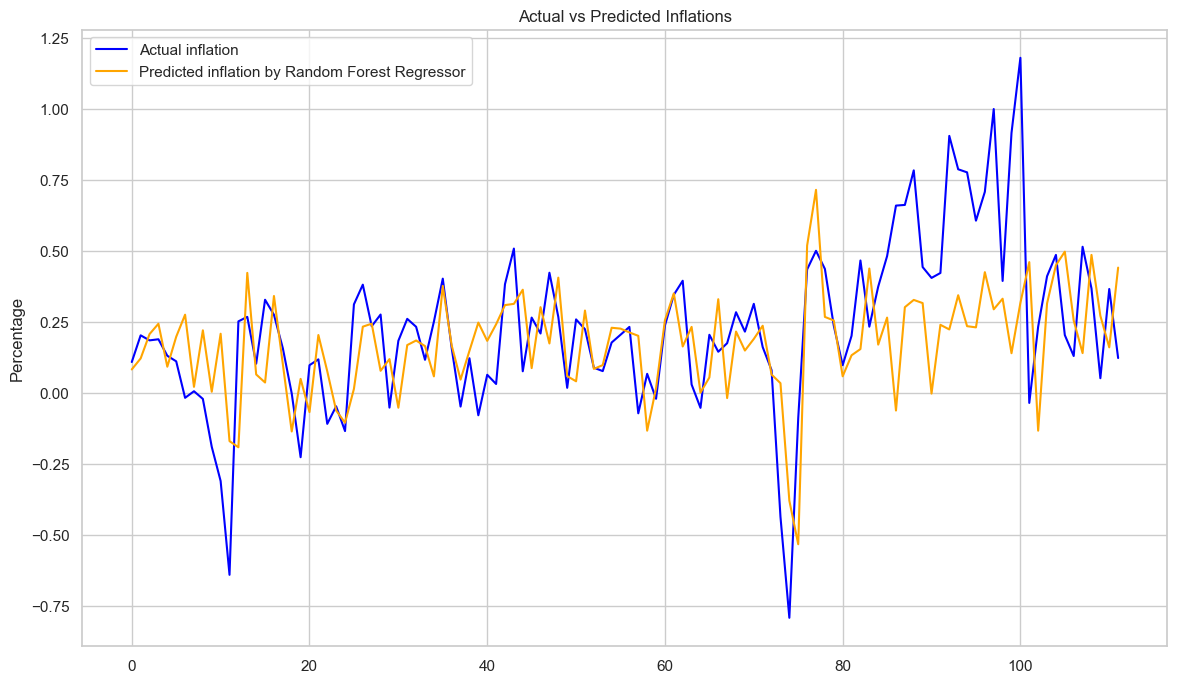

In [9]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='orange', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.07181388715074984
RMSE: 
0.2679811320797601
Correlation: 
             Actual  Predicted
Actual     1.000000   0.460569
Predicted  0.460569   1.000000
R2: 
0.16318301902885368


# Ridge

Running Time: 0.9139959812164307


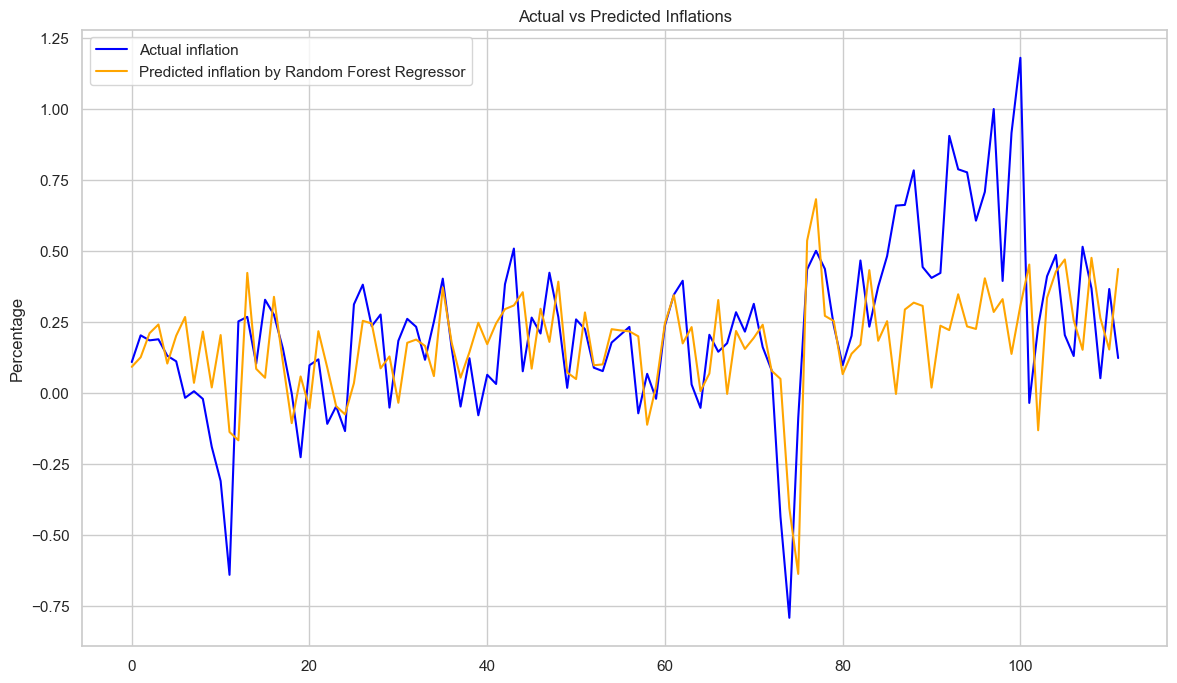

MSE: 
0.07185049486842253
RMSE: 
0.2680494261669339
Correlation: 
             Actual  Predicted
Actual     1.000000   0.461285
Predicted  0.461285   1.000000
R2: 
0.16275644471295847


In [137]:
alpha = 75
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ridge', Ridge(alpha=alpha))
            ]

    pipeline = Pipeline(steps)

    return pipeline

# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('pca', PCA(n_components=22, random_state=1)),
         ('ridge', Ridge(alpha=alpha))
        ]

pipeline = Pipeline(steps)

start=time.time()    
   
n_train = int(len(X)*0.7)  

n_records = len(X)

n_forecast = n_records-n_train

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

n_forecast = n_records-n_train
pd.options.display.max_rows=120
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result


plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='orange', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

# Lasso regression

Running Time: 0.894514799118042


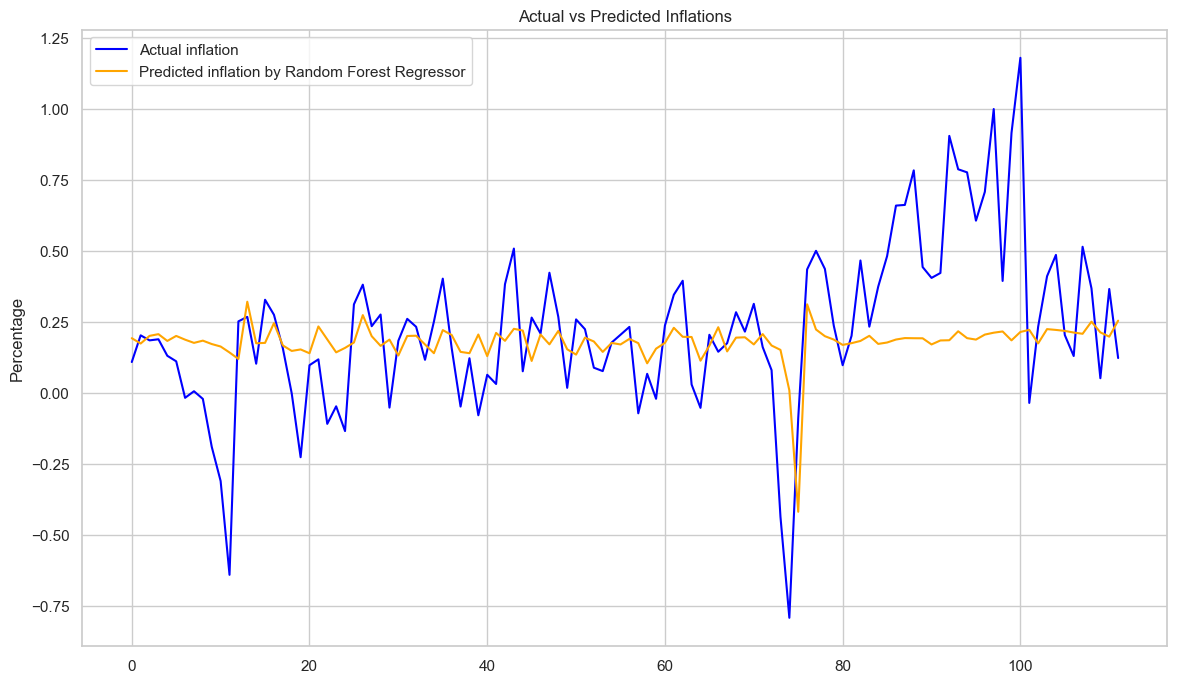

MSE: 
0.07950177201680389
RMSE: 
0.2819605859278986
Correlation: 
             Actual  Predicted
Actual     1.000000   0.323353
Predicted  0.323353   1.000000
R2: 
0.07359933460636303


In [169]:
alpha = 0.3
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('lasso', Lasso(alpha=alpha))
            ]

    pipeline = Pipeline(steps)

    return pipeline

# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('pca', PCA(n_components=22, random_state=1)),
         ('lasso', Lasso(alpha=alpha))
        ]

pipeline = Pipeline(steps)

start=time.time()    
   
n_train = int(len(X)*0.7)  

n_records = len(X)

n_forecast = n_records-n_train

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

n_forecast = n_records-n_train
pd.options.display.max_rows=120
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result


plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='orange', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

# Elastic Net

Running Time: 0.9028780460357666


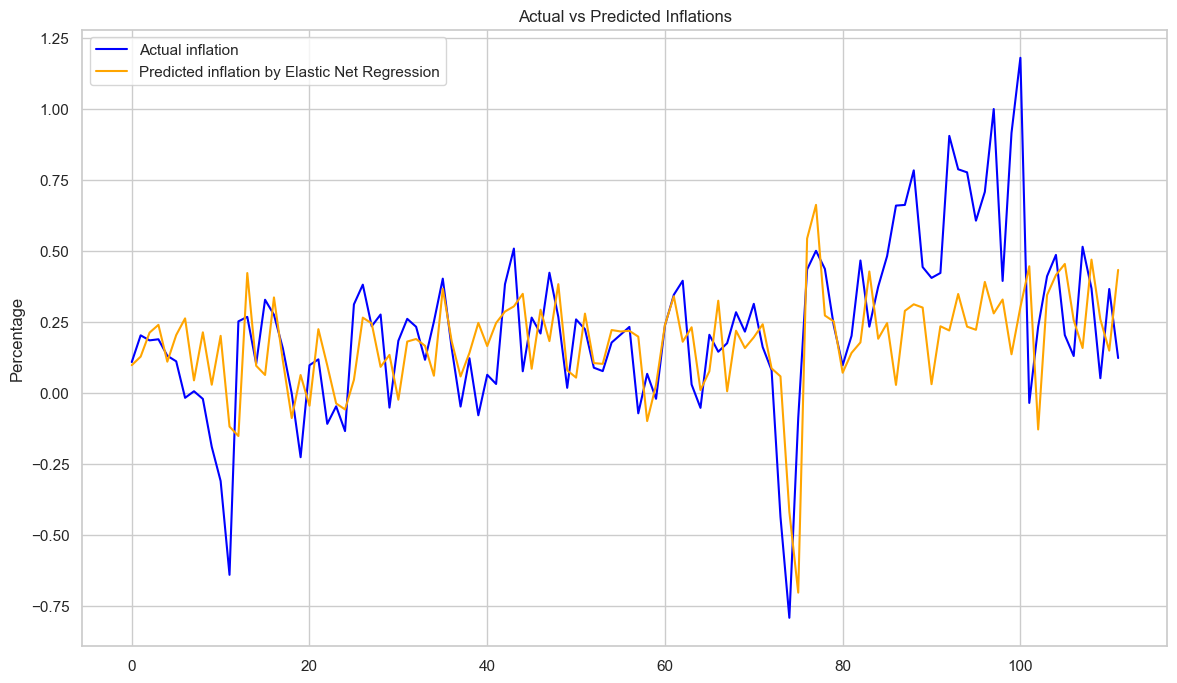

MSE: 
0.0718338876180696
RMSE: 
0.2680184464138049
Correlation: 
             Actual  Predicted
Actual     1.000000   0.459298
Predicted  0.459298   1.000000
R2: 
0.1629499620068129


In [157]:
alpha1 = 0.5
l1rat = 0.00001
# pipeline
def pipeline(config, alpha):
    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components=n_comps, random_state=1)),
             ('elasticnet', ElasticNet(alpha=alpha1, l1_ratio=l1rat))
            ]

    pipeline = Pipeline(steps)

    return pipeline

steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('pca', PCA(n_components=22, random_state=1)),
         ('elasticnet', ElasticNet(alpha=alpha1, l1_ratio=l1rat))
        ]

pipeline = Pipeline(steps)

start = time.time()

n_train = int(len(X) * 0.7)

n_records = len(X)

n_forecast = n_records - n_train

y_test_list = []
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)
    j += 1

end = time.time()

print("Running Time:", end - start)

n_forecast = n_records - n_train
pd.options.display.max_rows = 300
result = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='orange', label='Predicted inflation by Elastic Net Regression')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))